In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from torch import nn

In [200]:
PATH = Path('../data/mnist_kaggle/')
IMG_SIZE = 28

In [49]:
[x for x in PATH.iterdir()]

[PosixPath('../data/mnist_kaggle/test.csv'),
 PosixPath('../data/mnist_kaggle/mnist'),
 PosixPath('../data/mnist_kaggle/sample_submission.csv'),
 PosixPath('../data/mnist_kaggle/train.csv')]

In [64]:
test_x = pd.read_csv(filepath_or_buffer=PATH/'test.csv')
test_x.shape

(28000, 784)

In [167]:
train = pd.read_csv(filepath_or_buffer=PATH/'train.csv')
train.shape

(42000, 785)

In [189]:
train_y = train.label.as_matrix()
train_x = train.drop(columns=['label'], axis=1).as_matrix()
train_x.shape, train_y.shape

/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/max/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


((42000, 784), (42000,))

In [192]:
mean = train_x.mean()
std = train_x.std()
train_x = (train_x - mean)/std
train_x.mean(), train_x.std()

(9.77358783474097e-17, 1.0000000000000095)

In [193]:
img_arr = np.asarray(train_x); img_arr.shape

(42000, 784)

In [194]:
img = np.reshape(img_arr, (-1, IMG_SIZE, IMG_SIZE)); img.shape

(42000, 28, 28)

In [195]:
def show_img(img, title):
    plt.imshow(img, cmap="gray")
    plt.title(title)

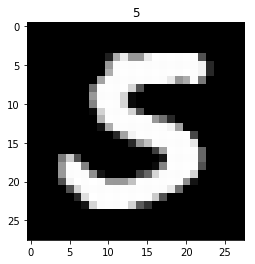

In [196]:
show_img(img[99], train_y[99])

In [206]:
model = nn.Sequential(
    nn.Linear(IMG_SIZE * IMG_SIZE, 100),
    nn.LogSoftmax(10)
)

In [207]:
model

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): LogSoftmax()
)